In [1]:
# importer stuff
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from pprint import pprint
import itertools

import cp
import base
from parafac2 import parafac2_als
import utils

%matplotlib notebook

## Load data

In [2]:
X = loadmat('datasets/gcwine.mat')['gcwine']['data'][0][0]
X = X/np.linalg.norm(X)
X_list = [X[..., k] for k in range(X.shape[-1])]
#X_list = [X[k] for k in range(X.shape[-1])]

## Decompose with PARAFAC2

In [3]:
P_k, F, A, D_k = parafac2_als(X_list, 3, convergence_th= 1e-20)

   0: loss is 9.14, improvement is 0.00


## Plot A

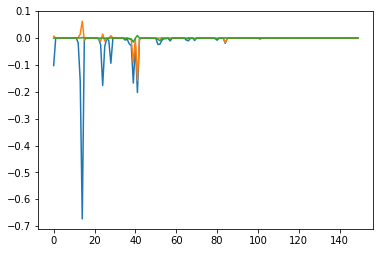

In [4]:
plt.figure()
plt.plot(A)
plt.show()

## Plot B

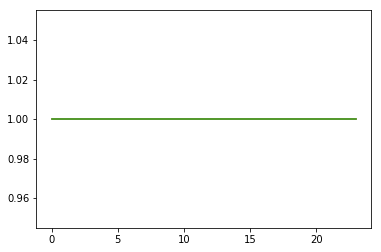

In [5]:
C = np.diagonal(D_k)
plt.figure()
plt.plot(C)
plt.show()

## Plot first F_k slice

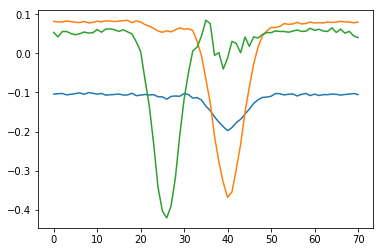

In [6]:
F_k = [P @ F for P in P_k]
plt.figure()
plt.plot(F_k[0])
plt.show()

## Plot them together

In [7]:
%matplotlib notebook

<IPython.core.display.Javascript object>


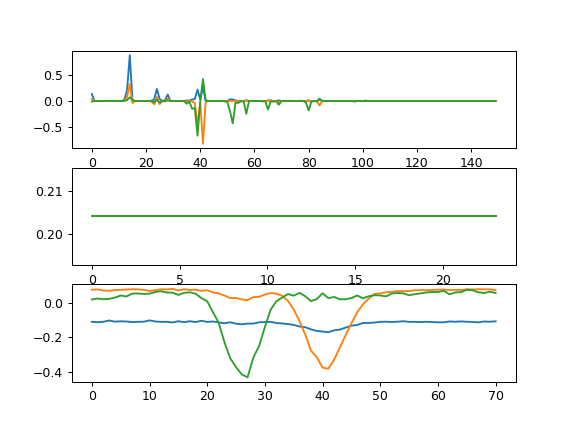

interactive(children=(IntSlider(value=11, description='k', max=23), Output()), _dom_classes=('widget-interact'…

In [8]:
fig, ax = plt.subplots(3, 1)

from ipywidgets import interact, interactive, fixed, interact_manual

(A_, C_), *_ = utils.prepare_for_comparison((A, C))

ax[0].plot(A_)
ax[1].plot(C_)

@interact(k=(0,len(F_k)-1))
def plot_F(k):
    #(F_k_,), *_ = utils.prepare_for_comparison((F_k[k],))
    ax[2].clear()
    ax[2].plot(F_k[k])